In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from kmodes.kprototypes import KPrototypes
import kmodes.util 
from sklearn.preprocessing import PowerTransformer
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from scipy.stats import f_oneway

plt.style.use("_classic_test_patch")

df = pd.read_csv("edificios_espana.csv", sep=";")

df.drop(columns="Codigo_Edi", inplace=True)
df.head()

,Numero_Alt,AnoC,Numero_Viv,USO,Npot,LCZ.cat,BUFF_RSOL,BUFF_SVF,BUFF_NDVI,BUFF_ACUS,BUFF_ALBED,BUFF_OZONO,perimetro,area,conv,elon,num_vecinos,vol,comp
0,13,1962,24,1,4,6,0.44,0.677,0.269,61.798,0.125,52.937,97.042214,587.48530,0.999933,0.885407,1,26730.58115,0.165182
1,6,1962,10,1,4,6,0.36,0.681,0.292,61.797,0.150,52.948,72.673017,233.40330,0.910109,0.745221,1,4901.46930,0.311362
2,6,1962,11,1,3,10,0.36,0.666,0.374,61.772,0.143,52.959,70.747217,232.49410,0.887248,0.764014,2,4882.37610,0.304297
3,6,1957,12,1,3,10,0.40,0.685,0.364,61.761,0.143,52.951,69.151406,234.33585,0.921026,0.784735,2,4921.05285,0.295095
4,6,1962,10,1,3,6,0.36,0.576,0.374,61.757,0.140,52.963,60.113166,192.82810,0.992334,0.818880,2,4049.39010,0.311745


**AGRUPAMIENTO:**

In [2]:
variables_deseadas = ["Numero_Alt", "Numero_Viv","Npot", "BUFF_RSOL", "BUFF_SVF", "BUFF_NDVI", "BUFF_ACUS", "BUFF_ALBED",
                      "BUFF_OZONO", "perimetro", "area", "conv", "elon", "num_vecinos", "vol", "comp"]

nuevo_df1 = df[variables_deseadas].copy()

pt = PowerTransformer()
X_transformed = pt.fit_transform(nuevo_df1)

nuevo_df = pd.DataFrame(X_transformed, columns=variables_deseadas)

nuevo_df["AnoC"] = df["AnoC"].values
nuevo_df["USO"] = df["USO"].values
nuevo_df["LCZ.cat"] = df["LCZ.cat"].values

nuevo_df.head()

,Numero_Alt,Numero_Viv,Npot,BUFF_RSOL,BUFF_SVF,BUFF_NDVI,BUFF_ACUS,BUFF_ALBED,BUFF_OZONO,perimetro,area,conv,elon,num_vecinos,vol,comp,AnoC,USO,LCZ.cat
0,1.931360,1.148280,0.539939,0.745623,0.654211,0.962807,-0.171950,-0.614542,0.271302,0.738866,1.002574,0.902347,1.301245,-0.621012,1.653733,-1.311949,1962,1,6
1,0.067969,0.658466,0.539939,0.348704,0.672734,1.158927,-0.172331,0.500644,0.273717,0.180278,0.016121,-1.245418,-1.090091,-0.621012,0.007517,0.149613,1962,1,6
2,0.067969,0.712088,-1.840920,0.348704,0.603103,1.607860,-0.181866,0.187480,0.276133,0.129592,0.012185,-1.465087,-0.890997,0.231816,0.004490,0.096762,1962,1,10
3,0.067969,0.761050,-1.840920,0.553275,0.691223,1.568506,-0.186054,0.187480,0.274376,0.086692,0.020144,-1.110363,-0.637283,0.231816,0.010613,0.025756,1957,1,10
4,0.067969,0.658466,-1.840920,0.348704,0.175076,1.607860,-0.187575,0.053484,0.277012,-0.173526,-0.174210,0.592747,-0.126846,0.231816,-0.137139,0.152433,1962,1,6


In [3]:
nuevo_df = nuevo_df.dropna()
nuevo_df = nuevo_df.dropna(axis=1)
print(nuevo_df.isnull().sum())

Numero_Alt     0
Numero_Viv     0
Npot           0
BUFF_RSOL      0
BUFF_SVF       0
BUFF_NDVI      0
BUFF_ACUS      0
BUFF_ALBED     0
BUFF_OZONO     0
perimetro      0
area           0
conv           0
elon           0
num_vecinos    0
vol            0
comp           0
AnoC           0
USO            0
LCZ.cat        0
dtype: int64


In [4]:
#Se Crearan 3 grupos, esto es modificable. 

kproto = KPrototypes(n_clusters=3, init='Huang', n_jobs = 4, random_state=17276365)
clusters_kproto = kproto.fit_predict(nuevo_df, categorical=[16,17,18])

In [5]:
nuevo_df["Categoria"] = clusters_kproto
nuevo_df.to_excel("resultados_kprototipos_FULL.xlsx", index=False)
nuevo_df.head()

,Numero_Alt,Numero_Viv,Npot,BUFF_RSOL,BUFF_SVF,BUFF_NDVI,BUFF_ACUS,BUFF_ALBED,BUFF_OZONO,perimetro,area,conv,elon,num_vecinos,vol,comp,AnoC,USO,LCZ.cat,Categoria
0,1.931360,1.148280,0.539939,0.745623,0.654211,0.962807,-0.171950,-0.614542,0.271302,0.738866,1.002574,0.902347,1.301245,-0.621012,1.653733,-1.311949,1962,1,6,2
1,0.067969,0.658466,0.539939,0.348704,0.672734,1.158927,-0.172331,0.500644,0.273717,0.180278,0.016121,-1.245418,-1.090091,-0.621012,0.007517,0.149613,1962,1,6,1
2,0.067969,0.712088,-1.840920,0.348704,0.603103,1.607860,-0.181866,0.187480,0.276133,0.129592,0.012185,-1.465087,-0.890997,0.231816,0.004490,0.096762,1962,1,10,1
3,0.067969,0.761050,-1.840920,0.553275,0.691223,1.568506,-0.186054,0.187480,0.274376,0.086692,0.020144,-1.110363,-0.637283,0.231816,0.010613,0.025756,1957,1,10,1
4,0.067969,0.658466,-1.840920,0.348704,0.175076,1.607860,-0.187575,0.053484,0.277012,-0.173526,-0.174210,0.592747,-0.126846,0.231816,-0.137139,0.152433,1962,1,6,1


**ANÁLISIS DE RESULTADOS:**

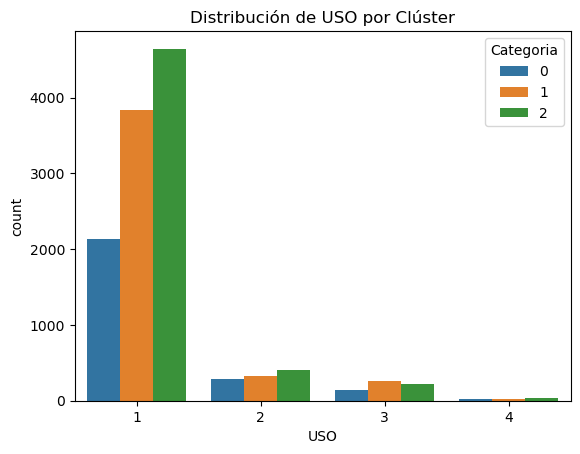

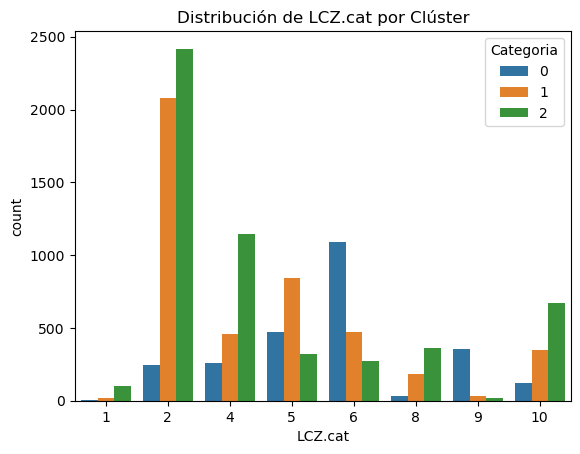

In [6]:
for col in ['USO', 'LCZ.cat']:
    sns.countplot(data=nuevo_df, x=col, hue='Categoria')
    plt.title(f"Distribución de {col} por Clúster")
    plt.show()

In [7]:
for col in nuevo_df.columns[:-1]:  # Excluyendo la columna 'Categoria'
    if nuevo_df[col].dtype != 'object':
        f_stat, p_val = f_oneway(*[nuevo_df[nuevo_df['Categoria'] == c][col] for c in nuevo_df['Categoria'].unique()])
        print(f"Variable: {col}, F-Statistic: {f_stat}, p-value: {p_val}")

Variable: Numero_Alt, F-Statistic: 8310.422636061723, p-value: 0.0
Variable: Numero_Viv, F-Statistic: 6343.291555877227, p-value: 0.0
Variable: Npot, F-Statistic: 23.09498899108211, p-value: 9.744122937126035e-11
Variable: BUFF_RSOL, F-Statistic: 2852.8062435588067, p-value: 0.0
Variable: BUFF_SVF, F-Statistic: 2783.823994336679, p-value: 0.0
Variable: BUFF_NDVI, F-Statistic: 2456.3250132854087, p-value: 0.0
Variable: BUFF_ACUS, F-Statistic: 474.6661163846395, p-value: 2.6119153052027832e-199
Variable: BUFF_ALBED, F-Statistic: 1261.8840695532406, p-value: 0.0
Variable: BUFF_OZONO, F-Statistic: 942.1436655651189, p-value: 0.0
Variable: perimetro, F-Statistic: 6571.378341551256, p-value: 0.0
Variable: area, F-Statistic: 7695.659762158942, p-value: 0.0
Variable: conv, F-Statistic: 53.71042183897495, p-value: 5.957160495496259e-24
Variable: elon, F-Statistic: 127.50100827842314, p-value: 1.5584665475620265e-55
Variable: num_vecinos, F-Statistic: 1375.7020475387642, p-value: 0.0
Variable: v

In [8]:
# Asumiendo que solo variables numéricas se usan para el cálculo
X_numericas = nuevo_df.drop(columns=['Categoria', 'USO', 'LCZ.cat', 'AnoC'])
labels = nuevo_df['Categoria']

score = silhouette_score(X_numericas, labels)
print(f"Silhouette Score: {score}")

Silhouette Score: 0.13993488789954192
